# Quantitative Trading: Interactive Dashboard for Plotting Qant Strategies

In this example, we delve into the application of quantitative trading by constructing an interactive dashboard that allows users to visualize and explore various financial data and strategies. 

Using sample (hourly) data, the dashboard plots key financial metrics, including open, high, low, and close (OHLC) prices, and overlays these with a simple technical analysis indicator (a moving average). 

This example serves as a practical template in exploring how quantitative strategies can be visualized and refined. The interactive nature of the dashboard provides an intuitive way to examine the relationship between different indicators and price movements, offering insights into potential trading opportunities.

**Warning**: May be slow for large datasets.

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Load Data

The file contains hourly Bitcoin data. There are a few *quirks* we must deal with, so we will do some data pre-processing first.

In [15]:
# Load data
df = pd.read_csv("./data/datas.csv", sep=",")
df

,Timestamp,Open,High,Low,Close,Volume_BTC,Volume_Currency,Weighted_Price
0,1315918800,5.800000e+00,6.000000e+00,5.800000e+00,6.000000e+00,2.500000e+01,1.491900e+02,5.967600e+00
1,1315922400,5.950000e+00,5.950000e+00,5.760000e+00,5.760000e+00,2.235398e+01,1.320410e+02,5.906823e+00
2,1315926000,5.650000e+00,5.650000e+00,5.650000e+00,5.650000e+00,2.542000e+00,1.436230e+01,5.650000e+00
3,1315929600,1.700000e+308,1.700000e+308,1.700000e+308,1.700000e+308,1.700000e+308,1.700000e+308,1.700000e+308
4,1315933200,1.700000e+308,1.700000e+308,1.700000e+308,1.700000e+308,1.700000e+308,1.700000e+308,1.700000e+308
...,...,...,...,...,...,...,...,...
52052,1503388800,3.794550e+03,3.807230e+03,3.753580e+03,3.795250e+03,8.401506e+02,3.179789e+06,3.784785e+03
52053,1503392400,3.795250e+03,3.927000e+03,3.795250e+03,3.922850e+03,1.509122e+03,5.853718e+06,3.878889e+03
52054,1503396000,3.906740e+03,3.922890e+03,3.864630e+03,3.879040e+03,4.930284e+02,1.915458e+06,3.885086e+03
52055,1503399600,3.868520e+03,3.903370e+03,3.868520e+03,3.899000e+03,3.815390e+02,1.485393e+06,3.893162e+03


In [17]:
# Assuming your dataframe is called 'df'
# Convert 'timestamp' to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')

# Set 'timestamp' as the DataFrame index
df.set_index('Timestamp', inplace=True)

In [19]:
# Now 'Timestamp' is your index
df.tail(25)

,Open,High,Low,Close,Volume_BTC,Volume_Currency,Weighted_Price
Timestamp,,,,,,,
2017-08-21 12:00:00,4043.64,4054.68,4022.02,4029.05,278.957541,1.125684e+06,4035.325221
2017-08-21 13:00:00,4031.01,4047.15,3990.00,3997.97,746.141500,2.992334e+06,4010.410994
2017-08-21 14:00:00,3997.98,4016.03,3969.16,4016.02,1039.479798,4.148903e+06,3991.326556
2017-08-21 15:00:00,4012.96,4034.54,4000.00,4004.99,758.191432,3.047599e+06,4019.563720
2017-08-21 16:00:00,4004.99,4017.47,3990.00,4002.26,260.006009,1.041554e+06,4005.883119
2017-08-21 17:00:00,3998.14,4015.05,3975.87,3988.01,465.921856,1.859547e+06,3991.114254
2017-08-21 18:00:00,3990.00,4000.06,3962.21,4000.06,557.842088,2.222150e+06,3983.475336
2017-08-21 19:00:00,4000.06,4021.94,3998.66,4014.21,271.052986,1.087327e+06,4011.493165
2017-08-21 20:00:00,4003.00,4018.80,3986.36,3999.00,328.844852,1.315869e+06,4001.488074


In [23]:
# Get a subset of data, the dataset is too large and slows the program otherwise:
df=df.loc['2015-07-21 12:00:00':'2017-08-22 12:00:00']

## Create interactive dashboard

In [26]:
def create_bitcoin_dashboard(df):
    """
    Create an interactive dashboard for Bitcoin price data
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing Bitcoin OHLCV data with datetime index
    """
    # Create figure with secondary y-axis
    fig = make_subplots(rows=2, cols=1, 
                       shared_xaxes=True,
                       vertical_spacing=0.03,
                       subplot_titles=('Bitcoin Price', 'Trading Volume'),
                       row_heights=[0.7, 0.3])

    # Add candlestick chart
    fig.add_trace(
        go.Candlestick(
            x=df.index,
            open=df['Open'],
            high=df['High'],
            low=df['Low'],
            close=df['Close'],
            name='OHLC'
        ),
        row=1, col=1
    )

    # Add MA20 to price chart
    ma20 = df['Close'].rolling(window=20).mean()
    fig.add_trace(
        go.Scatter(
            x=df.index,
            y=ma20,
            line=dict(color='orange', width=2),
            name='20-period MA'
        ),
        row=1, col=1
    )

    # Add volume bar chart
    fig.add_trace(
        go.Bar(
            x=df.index,
            y=df['Volume_BTC'],
            name='Volume',
            marker_color='rgb(158,202,225)'
        ),
        row=2, col=1
    )

    # Add Weighted Price line
    fig.add_trace(
        go.Scatter(
            x=df.index,
            y=df['Weighted_Price'],
            line=dict(color='purple', width=1, dash='dot'),
            name='Weighted Price',
            opacity=0.7
        ),
        row=1, col=1
    )

    # Update layout
    fig.update_layout(
        title='Bitcoin Price Analysis Dashboard',
        yaxis_title='Price (USD)',
        yaxis2_title='Volume (BTC)',
        xaxis_rangeslider_visible=False,
        height=800,
        showlegend=True,
        template='plotly_white',
    )

    # Update y-axes labels
    fig.update_yaxes(title_text="Price (USD)", row=1, col=1)
    fig.update_yaxes(title_text="Volume (BTC)", row=2, col=1)

    # Add range selector
    fig.update_xaxes(
        rangeslider_visible=False,
        rangeselector=dict(
            buttons=list([
                dict(count=6, label="6H", step="hour", stepmode="backward"),
                dict(count=12, label="12H", step="hour", stepmode="backward"),
                dict(count=24, label="24H", step="hour", stepmode="backward"),
                dict(count=1, label="1M", step="month", stepmode="backward"),
                dict(count=1, label="1Y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        )
    )

    return fig

## Plot and Save

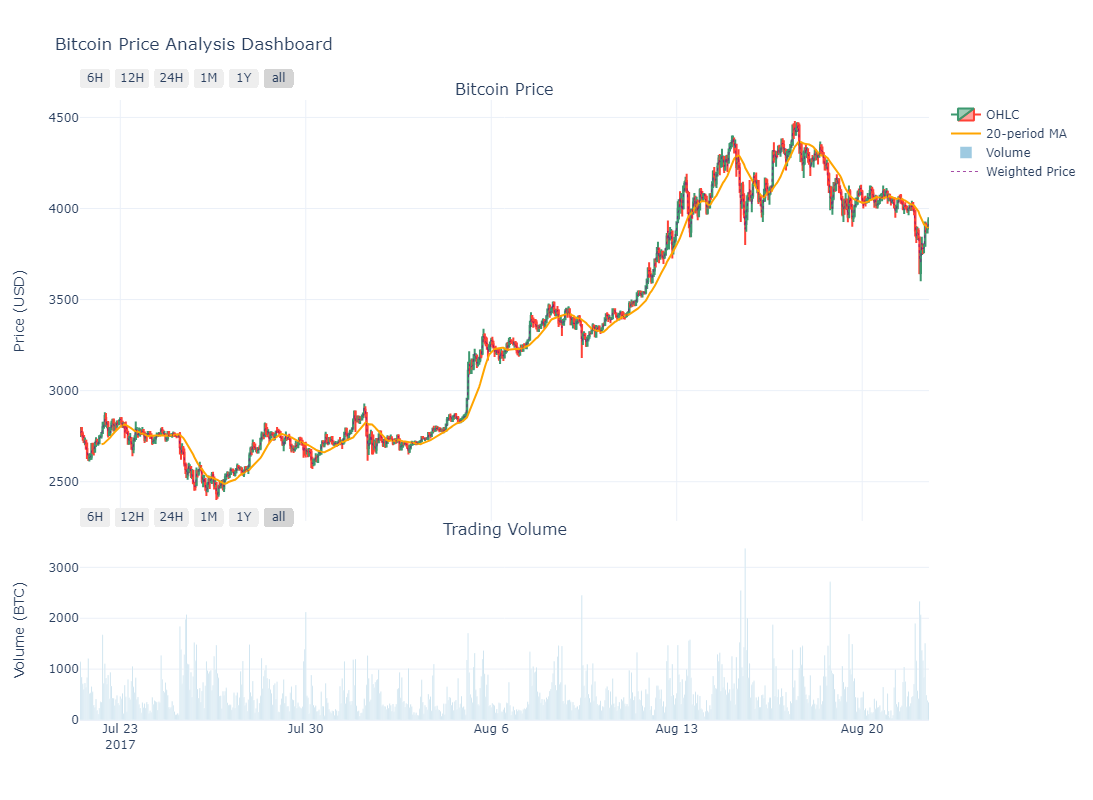

In [32]:
# Create and display the dashboard
fig = create_bitcoin_dashboard(df)
fig.show()

# Optional: Save the plot as HTML file for sharing
fig.write_html("bitcoin_dashboard.html")

The inclusion of technical analysis indicators on OHLC charts allows for a more dynamic understanding of price trends and market signals. 

This example not only demonstrates how to implement such a system but also serves as a flexible template that you can extend further. Whether by adding additional technical indicators, modifying the underlying dataset, or experimenting with different visualization techniques, this dashboard offers a hands-on approach to developing and refining trading strategies.